# Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import matplotlib.pyplot as plt

from torchvision.models import inception_v3
from torchvision import transforms
from torch.utils.data import DataLoader
from gan_package.gan import GAN
from gan_package.vanillaGAN import VanillaGAN_Generator, VanillaGAN_Discriminator

# Create dataset

In [2]:
image_size = 256
batch_size = 256
root = 'lsun/bedroom'

dataset = dset.ImageFolder(root=root,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    

# Set parameters

In [ ]:
batch_size = 256
learning_rate_gen = 0.0005
learning_rate_dis = 0.005

In [ ]:
img_shape = dataloader.dataset[0][0].shape
n_out = torch.prod(torch.tensor(img_shape))
latent_dim = 100

inception_model = inception_v3(pretrained=True, transform_input=False, aux_logits=True)
vanilla_generator = VanillaGAN_Generator(latent_dim=latent_dim, img_shape=img_shape, n_out=n_out)
vanilla_discriminator = VanillaGAN_Discriminator(img_shape=img_shape)
vanilla_gan = GAN(generator=vanilla_generator, discriminator=vanilla_discriminator, inception_model=inception_model)


criterion = nn.BCELoss()

vanilla_generator_optimizer = optim.Adam(vanilla_generator.parameters(), lr=learning_rate_gen, weight_decay=0.0001)
vanilla_discriminator_optimizer = optim.Adam(vanilla_discriminator.parameters(), lr=learning_rate_dis, weight_decay=0.0001)

# Training loop

In [ ]:
vanilla_gan.train(dataset=dataset,
                    dataloader=dataloader,
                    discriminator_optimizer=vanilla_discriminator_optimizer,
                    generator_optimizer=vanilla_generator_optimizer,
                    criterion=criterion,
                    num_epochs=20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


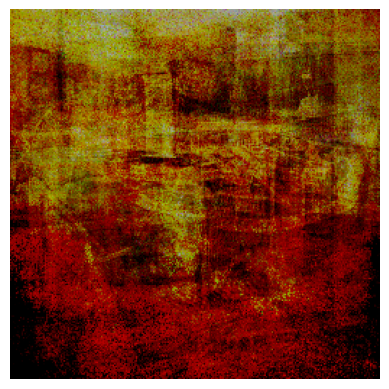

In [14]:
import torch
import torchvision.transforms as transforms

batch_size = 256
z = torch.randn(batch_size, latent_dim)
fake_images = vanilla_gan.generator(z)


transform = transforms.ToPILImage()
# Convert the tensor to a NumPy array
image_tensor = fake_images[0]
image_np = image_tensor.detach().numpy()

# Transpose the dimensions to match the expected shape for an image
image_np = image_np.transpose(1, 2, 0)

# Display the image using plt.imshow
plt.imshow(image_np)
plt.axis('off')  # Remove axis ticks and labels
plt.show()


In [16]:
vanilla_gan.save_generator('models/vanilla_generator.pt')
vanilla_gan.save_discriminator('models/vanilla_discriminator.pt')